
Số lượng giá trị thiếu trong mỗi đặc trưng:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

MAE (Mean Absolute Error): 0.45625021317829456
MSE (Mean Squared Error): 0.46109951661347437
RMSE (Root Mean Squared Error): 0.6790430889225472
Accuracy: 0.6481254903851033
R2 (R-squared): 0.6481254903851033


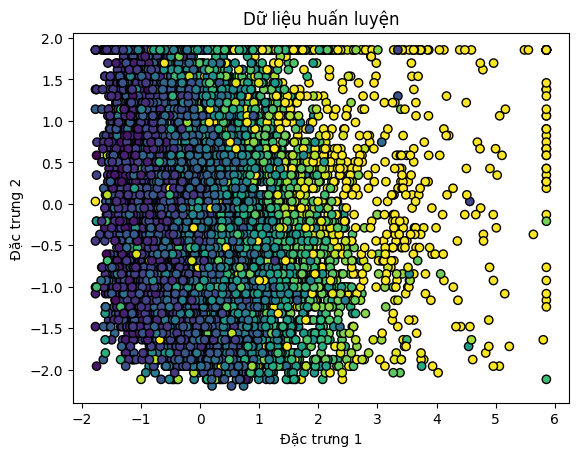

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Tải bộ dữ liệu California Housing
california_housing = fetch_california_housing()
X = california_housing.data  # Đặc trưng
y = california_housing.target  # Nhãn (giá nhà)

# Chuyển đổi X thành DataFrame để dễ xử lý
X = pd.DataFrame(X, columns=california_housing.feature_names)

# 2. Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi đặc trưng:")
print(X.isnull().sum())

# 3. Xử lý giá trị thiếu
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Khởi tạo và huấn luyện mô hình KNN hồi quy
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # KNN hồi quy
knn_regressor.fit(X_train, y_train)

# 7. Dự đoán và đánh giá mô hình
y_pred = knn_regressor.predict(X_test)

# Tính các chỉ số đánh giá hồi quy
mae = mean_absolute_error(y_test, y_pred)  # MAE
mse = mean_squared_error(y_test, y_pred)  # MSE
accuracy = knn_regressor.score(X_test, y_test)  # Accuracy
rmse = np.sqrt(mse)  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# In các chỉ số đánh giá
print("\nMAE (Mean Absolute Error):", mae)
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("Accuracy:", accuracy)
print("R2 (R-squared):", r2)


# 8. Trực quan hóa dữ liệu (nếu cần thiết)
# Chỉ hiển thị trực quan nếu dữ liệu có số lượng đặc trưng ít (2 hoặc 3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.title('Dữ liệu huấn luyện')
plt.show()
